<a href="https://colab.research.google.com/github/LeXuanNT/DataScience9_Ex1_Bartender_Project/blob/main/DL4CV_assignment_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Generative Adversarial Network (GAN) {-}

This assignment aims at familiarizing you with training, validating and testing a Generative Adversarial Network (GAN). Here are the requirements of the assignment:

- Load the dataset. To save training time, you only need to load and work on ONE image class of your choice.
- Process the images.
- Build a GAN architecture consisting of at least one (01) Discriminator and one (01) Generator of which the architectures are of your choice. You are encouraged to customize the network architectures to be different from the ones demonstrated in the demo code. There are two levels of image generation requirements:
    - First-level requirement: train and generate images for ONE class of the dataset using vanilla GAN. You are free to choose which class of object you are interested in working on.
    - Second-level requirement: train and generate images for ONE class of the dataset using the mechanism of ProGAN. In this requirement, you do not need to strictly follow the implementation in the ProGAN paper. Feel free to construct a light version (a simple incremental network architecture) of it yourself.
- Visualize the model behaviors during the training.
- Visualize the generated images.

The dataset you will be working on is CIFAR-10. This dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

Here follows some data samples in the dataset:

![alt text](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment-DL4CV-notebook.ipynb: Jupyter notebook containing source code, for example 2012345-assignment-DL4CV-notebook.ipynb

### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model performance. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [ ]:
# Note: to enable GPU training in Colab, go to Runtime > Change runtime type > Hardware acceleration > Choose GPU from the drop-down list.

!pip install tensorflow_datasets

# Import libraries
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
#from keras.utils import np_utils
from keras import Model

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=567d399d980de625828adb0a5c2ee10c6ae5405a0f3c05c93862a745b19d169d
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras              # Keras is the high-level API of TensorFlow
from numpy import zeros, ones, vstack, expand_dims
from numpy.random import randn, randint

# First-level requirement
First-level requirement: train and generate images for ONE class of the dataset using vanilla GAN. You are free to choose which class of object you are interested in working on.

In [ ]:
# Get the full dataset (batch_size=-1) in NumPy arrays from the returned tf.Tensor object
cifar10_train = tfds.load(name="cifar10", split=tfds.Split.TRAIN, batch_size=-1 )
cifar10_test = tfds.load(name="cifar10", split=tfds.Split.TEST, batch_size=-1)

# Convert tfds dataset to numpy array records
cifar10_train = tfds.as_numpy(cifar10_train)
cifar10_test = tfds.as_numpy(cifar10_test)

# Seperate feature X and label Y
X_train, y_train = cifar10_train["image"], cifar10_train["label"]
X_test, y_test = cifar10_test["image"], cifar10_test["label"]

# Print shapes of the entire training and test set of CIFAR 10
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_train shape: " + str(y_train.shape))
print("y_test shape: " + str(y_test.shape))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteCD2D59/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteCD2D59/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000,)
y_test shape: (10000,)


In [ ]:
# Get samples  of a certain label
label = 2 # Class '2' is bird.
train_indices = np.where(y_train == label) # Get indices of the label
train_set = X_train[train_indices] # Get train samples of the label
test_indices = np.where(y_test == label) # Get indices of the label
test_set = X_train[test_indices] # Get test samples of the label

# Print shapes of datasets of the selected class
print("train_set shape of the selected class: " + str(train_set.shape))
print("test_set shape of the selected class: " + str(test_set.shape))

# NOTE: training a GAN does not require to have train/test split. All data samples of the training and the test set are used as real data samples.
# You should merge the training and the test set to get more real data samples, i.e., merge the train_set and the test_set to one dataset which is the real dataset.

train_set shape of the selected class: (5000, 32, 32, 3)
test_set shape of the selected class: (1000, 32, 32, 3)


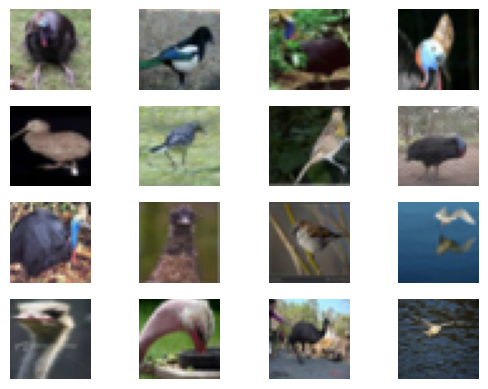

In [ ]:
# Visualize some data samples of class '2' (bird)
import matplotlib.pyplot as plt
for i in range(16):
  # define subplot
  plt.subplot(4,4,1+i)
  # turn off axis
  plt.axis("off")
  # plot raw pixel data
  imgplot = plt.imshow(train_set[i])
plt.show()

## 1.1 Build a GAN architecture

#### Build the Generator
- Generator transforms a latent vector(128,1) to an output image (32,32,3)
- Using 1 FC layer to convert vector to a vector of size (4,4,128)
- Using 3 Conv2dTranspose to upsample vectors from 4x4x128 to 32x32x128
- Using 1 Conv2D to convert vector to 32x32x3 in order to comply with the input of the Discriminator

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4096)              528384    
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_7 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_21 (Conv2  (None, 8, 8, 128)         524416    
 DTranspose)                                                     
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_22 (Conv2  (None, 16, 16, 128)       262272    
 DTranspose)                                         

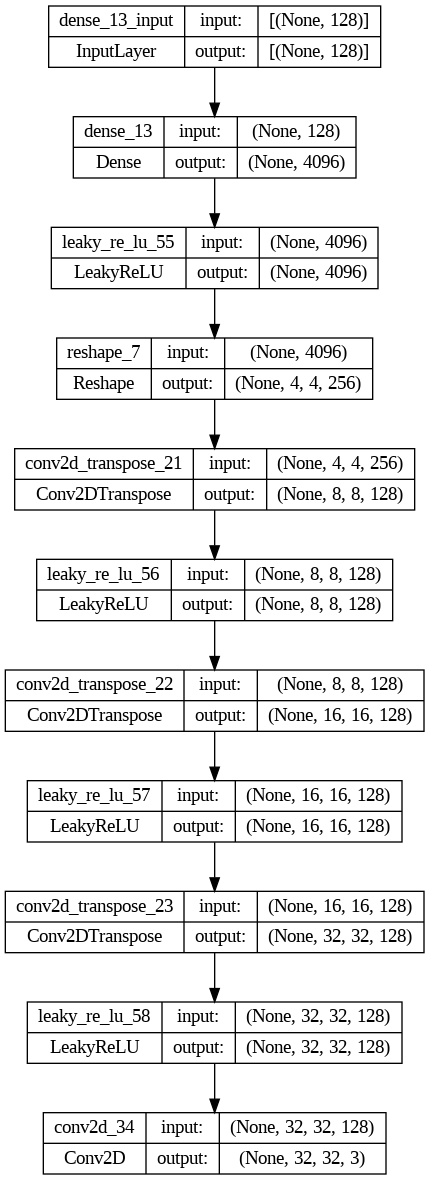

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Conv2DTranspose, Dropout, LeakyReLU
from keras.layers import Reshape, BatchNormalization, GlobalMaxPooling2D
from keras.utils import plot_model

# Define the structure of Generator
def define_generator(latent_dim):
  # latent_dim: dimension of the random input vector

  model = Sequential() # Initialize a sequential model for Generator

  # Foundation for 4x4 image
  n_nodes = 256*4*4 # expected vector size for converting to a feature map
  model.add(Dense(input_dim=latent_dim, units=n_nodes)) # FC layer to convert vector to a vector of size n_nodes
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4,4,256)))

  # Upsample from 4x4 to 8x8 using Conv2DTranspose
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  # Upsample from 8x8 to 16x16 using Conv2DTranspose
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  # Upsample from 16x16 to 32x32 using Conv2DTranspose
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  # convert from 32x32x128 to 32x32x3
  model.add(Conv2D(3,(3,3), activation='tanh', padding='same'))

  return model # Return the Generator

# Show the Generator structure
latent_dim = 128
generator = define_generator(latent_dim)
generator.summary()

# Plot the Generator model
plot_model(generator, to_file='generator_plot.png',show_shapes=True, show_layer_names=True)

#### Build the Discriminator
- Using 1 normal Conv2D layer and 3 upsample Conv2D to convert vector (32,32,3) to (256,1)
- A single node in the output layer with the sigmoid activation function to predict where the input sample is real or fake (0/1)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_59 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_61 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_38 (Conv2D)          (None, 4, 4, 256)       

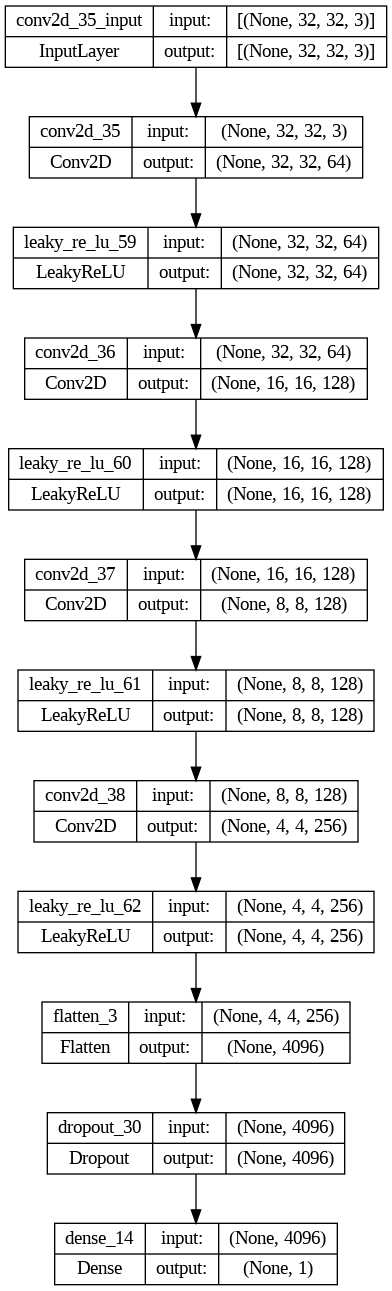

In [ ]:
# define the structure of discriminator model
def define_discriminator(in_shape=(32,32,3)):
  model = Sequential() # Initialize a sequential model for Discriminator

  # Block 1 conv
  #model.add(Conv2D(32, (3,3),strides=(2,2), padding='same', input_shape=in_shape))
  #model.add(LeakyReLU(alpha=0.2))
  #model.add(Dropout(0.5))

  # Block 2 conv
  model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  #model.add(Dropout(0.5))

  # Block 3 conv
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  #model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  #model.add(Dropout(0.5))

  # Block 4 conv
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  #model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  #model.add(Dropout(0.5))

  # Block 5 conv
  model.add(Conv2D(256,(3,3), strides=(2,2), padding='same'))
  #model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.02))
  #model.add(Dropout(0.5))

  # classifier
  #model.add(GlobalMaxPooling2D())
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

# define model
discriminator = define_discriminator()
# summarize the model
discriminator.summary()
# plot the model
plot_model(discriminator, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)


#### Build the GAN with Generator and Discriminator

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_22 (Sequential)  (None, 32, 32, 3)         1466115   
                                                                 
 sequential_23 (Sequential)  (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


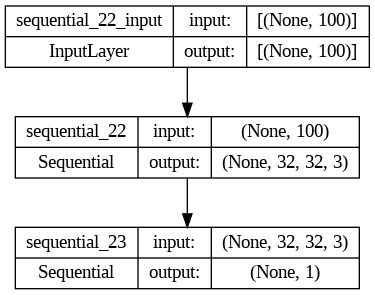

In [ ]:
# Define the GAN network consisting of a Generator and a Discriminator
def define_gan(g_model, d_model):
    # g_model: Generator component
    # d_model: Discriminator component

    d_model.trainable = False

    model = Sequential() # Initialize a sequential model
    model.add(g_model) # Add the Generator component
    model.add(d_model) # Add the Discriminator component
    return model # Return the GAN

# size of the latent space
latent_dim = 100
# create the generator model
g_model = define_generator(latent_dim)
# create the discriminator model
d_model = define_discriminator()
# create the gan model
gan_model = define_gan(g_model,d_model)
# summarize gan model
gan_model.summary()
# Plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

## 1.2 Prepare real and fake data samples from CIFAR10 dataset

#### Prepare real data samples from CIFAR10 dataset

In [ ]:
# Load and normalize CIFAR10 tranining images
def load_real_samples(train_set):
  # We use train_set and test_set are loaded from CIFAR10 dataset above.
  # Convert pixel values from unsigned int to float32 for normalization calculation
  X = train_set.astype('float32')
  # Normalize from [0,255] to [0,1]
  X = (X - 127.5)/127.5
  # Return the set of normalized images
  return X

# Select real samples from the real dataset for training purpose
def generate_real_samples(dataset, n_samples):
    # Generate random n_samples sample indices from the dataset
    ix = randint(0, dataset.shape[0], n_samples)
    # Get the images from the list of indices
    X = dataset[ix]
    # Generate labels for the real samples (label=1)
    y = ones((n_samples, 1))
    return X, y # Return the real images and labels.

#### Generate fake data samples by passing a random vector through the Generator

In [ ]:
# Generate random latent vectors as input for Generator
def generate_latent_points(latent_dim, n_samples):
    # Generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # Reshape to a batch of inputs for the Generator
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# Use Generator to generate n_samples fake samples
def generate_fake_samples(g_model, latent_dim, n_samples):
    # Generate random latent vectors as input for Generator
    x_input = generate_latent_points(latent_dim, n_samples)
    # Generate fake data samples by passing the random latent vectors through the Generator
    X = g_model.predict(x_input)
    # Generate labels for the fake samples (label=0)
    y = zeros((n_samples, 1))
    return X, y # Return the fake images and labels.

#### Training process with the Generator and the Discriminator

In [ ]:
# Train the Generator and the Discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=201, n_batch=4096):
    bat_per_epo = int(dataset.shape[0] / n_batch) # Number of iterations per epoch
    half_batch = int(n_batch / 2) # A batch to the Discriminator contains real samples (half-batch) and fake samples (half-batch)

    d_loss_values = [] # Array containing Discriminator loss over iterations
    g_loss_values = [] # Array containing Generator loss over iterations

    # Number of epochs
    for i in range(n_epochs):
        # Number of iterations
        for j in range(bat_per_epo):

            # Randomly get half_batch real data samples from the real dataset
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # Generate half_batch fake data samples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # Create training set for the discriminator: half-batch real and half-batch fake
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))

            # Update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)

            # Generate random latent vectors as input for Generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # Generate inverted labels for the fake samples to train the Generator
            y_gan = ones((n_batch, 1))
            # Train the Generator
            g_loss = gan_model.train_on_batch(X_gan, y_gan)

            # Training log after every iteration
            print('Epoch %d, Iteration %d/%d, D_loss = %.3f, G_loss = %.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

            # Add loss values to historical arrays
            d_loss_values.append(d_loss)
            g_loss_values.append(g_loss)

        # Plot the generated images every certain number of epochs
        if (i+1) % 10 == 0:
            X_fake, _ = generate_fake_samples(g_model, latent_dim, 100) # Generate 100 fake data samples using the Generator. Pixel values are in [0,1]
            save_plot(X_fake, i, n=10) # Plot a grid of 10x10 fake samples and save to file at epoch i

    return d_loss_values, g_loss_values # Return the loss arrays of Generator and Discriminator


#### Plot the Generator's outputs

In [ ]:
# Create and save a plot of generated images
def save_plot(samples, epoch, n=10):
    # Define a plot of (n rows, n columns)
    for i in range(n * n):
        # (1+i) is the index position on a grid with nrows rows and ncols columns. Index starts at 1 in the upper left corner and increases to the right.
        plt.subplot(n, n, 1+i)
        plt.axis('off') # Disable axis
        plt.imshow(samples[i, :, :, 0], cmap='gray_r') # Plot the sample i with reversed gay color map
    filename = 'Plot_epoch_%03d.png' % (epoch+1)
    plt.savefig(filename) # Save plot to file
    plt.close() # Close the plot

## 1.3 Main code

In [ ]:
# Import optimization library
#from keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.legacy import Adam
#from matplotlib import pyplot

# Size of the latent space
latent_dim = 128
epochs = 200
batch_size = 512

# Initialize an optimizer. Pick one.
opt = Adam(learning_rate=0.0002, beta_1=0.5) # Adam optimizer with customized values (for the best result)
# opt = Adam() # Adam optimizer with default values
# opt = SGD() # SGD optimizer with default values

# Create the Discriminator
d_model = define_discriminator()
d_model.trainable = True
d_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Create the Generator
g_model = define_generator(latent_dim)

# Create the GAN
d_model.trainable = False
gan_model = define_gan(g_model, d_model)
gan_model.compile(loss='binary_crossentropy', optimizer=opt)

# Load real image data from the MNIST dataset
dataset = load_real_samples(train_set)

# Train the GAN
d_losses, g_losses = train(g_model, d_model, gan_model, dataset, latent_dim, epochs, batch_size)

8/8 [==============================] - 0s 2ms/step
Epoch 1, Iteration 1/9, D_loss = 0.694, G_loss = 0.694
8/8 [==============================] - 0s 2ms/step
Epoch 1, Iteration 2/9, D_loss = 0.674, G_loss = 0.693
8/8 [==============================] - 0s 2ms/step
Epoch 1, Iteration 3/9, D_loss = 0.649, G_loss = 0.689
8/8 [==============================] - 0s 2ms/step
Epoch 1, Iteration 4/9, D_loss = 0.628, G_loss = 0.674
8/8 [==============================] - 0s 2ms/step
Epoch 1, Iteration 5/9, D_loss = 0.598, G_loss = 0.629
8/8 [==============================] - 0s 2ms/step
Epoch 1, Iteration 6/9, D_loss = 0.607, G_loss = 0.541
8/8 [==============================] - 0s 2ms/step
Epoch 1, Iteration 7/9, D_loss = 0.702, G_loss = 0.497
8/8 [==============================] - 0s 2ms/step
Epoch 1, Iteration 8/9, D_loss = 0.754, G_loss = 0.532
8/8 [==============================] - 0s 2ms/step
Epoch 1, Iteration 9/9, D_loss = 0.700, G_loss = 0.629
8/8 [==============================] - 0s 2ms/

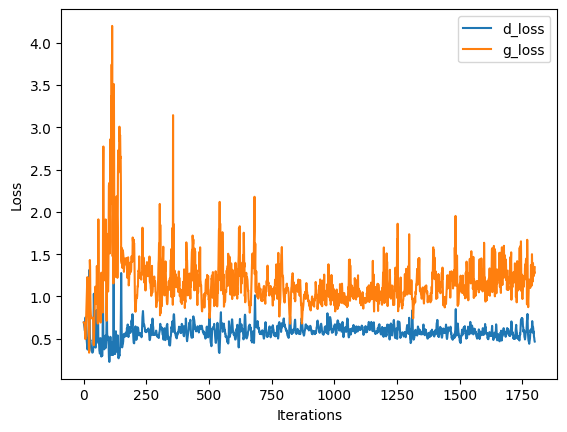

In [ ]:
### Plot the training loss of the Generator and the Discriminator over iterations

# Initialize values of x-axis (iterations)
dx = np.linspace(0, len(d_losses), len(d_losses))
gx = np.linspace(0,len(g_losses), len(d_losses))

# Plot the training loss of G and D
plt.plot(dx, d_losses)
plt.plot(gx, g_losses)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend(['d_loss', 'g_loss'], loc='upper right')
plt.show()

## 1.4 Save and load the models

In [ ]:
# Save the Discriminator, Generator and GAN model
d_model.save('d_model.sav')
g_model.save('g_model.sav')
gan_model.save('gan_model.sav')

4/4 [==============================] - 0s 2ms/step


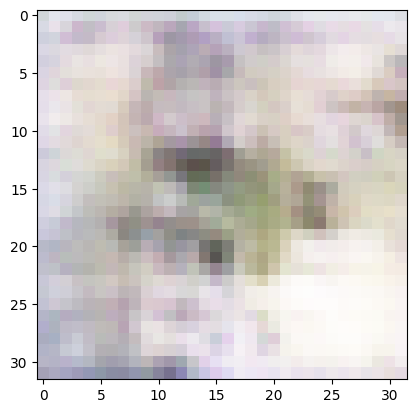

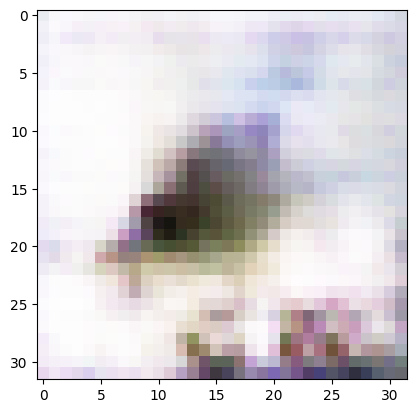

In [ ]:
# Load the Generator from saved model
g_model = keras.models.load_model("g_model.sav")

# Generate 100 fake images by passing 100-dimensional random vectors through the Generator.
X_fake, _ = generate_fake_samples(g_model, 128, 100)

# Visualize the generated images
img = (X_fake[0]+1)/2    #
imgplot = plt.imshow(img)
plt.show()
img = (X_fake[1]+1)/2    #
imgplot = plt.imshow(img)
plt.show()

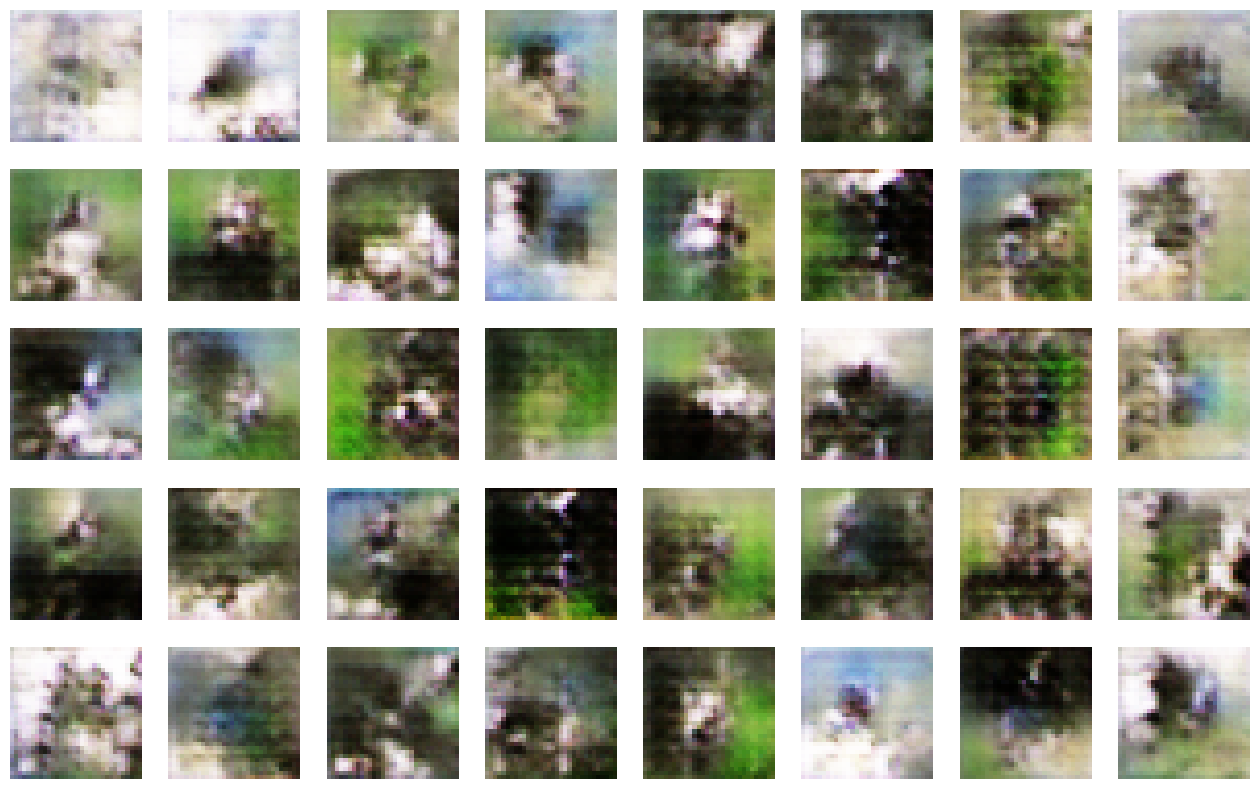

In [ ]:
f, ax = plt.subplots(5,8, figsize=(16,10))
for i,rand in enumerate(X_fake[:40]):

  # imgplot = plt.imshow(rand)
  rand = (rand+1)/2    #
  ax[i//8, i%8].imshow(rand)
  ax[i//8, i%8].axis('off')
plt.show()

In [ ]:
# Compress output folders for downloading

!zip -r /content/d_model.zip /content/d_model.sav
!zip -r /content/g_model.zip /content/g_model.sav
!zip -r /content/gan_model.zip /content/gan_model.sav

  adding: content/d_model.sav/ (stored 0%)
  adding: content/d_model.sav/variables/ (stored 0%)
  adding: content/d_model.sav/variables/variables.index (deflated 67%)
  adding: content/d_model.sav/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/d_model.sav/keras_metadata.pb (deflated 92%)
  adding: content/d_model.sav/saved_model.pb (deflated 88%)
  adding: content/d_model.sav/fingerprint.pb (stored 0%)
  adding: content/d_model.sav/assets/ (stored 0%)
  adding: content/g_model.sav/ (stored 0%)
  adding: content/g_model.sav/variables/ (stored 0%)
  adding: content/g_model.sav/variables/variables.index (deflated 56%)
  adding: content/g_model.sav/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/g_model.sav/keras_metadata.pb (deflated 92%)
  adding: content/g_model.sav/saved_model.pb (deflated 89%)
  adding: content/g_model.sav/fingerprint.pb (stored 0%)
  adding: content/g_model.sav/assets/ (stored 0%)
  adding: content/gan_model.sav/ (stor

# Second-level requirement
Second-level requirement: train and generate images for ONE class of the dataset using the mechanism of ProGAN. In this requirement, you do not need to strictly follow the implementation in the ProGAN paper but feel free to construct a light version (a simple incremental network architecture) of it yourself. NOTE: it is fine to try and fail (i.e., you may not be able to generate good quality images), but at least you give it a try.

In [ ]:
# Your code goes here